In [1]:
import model
import torch
import torch.nn as nn
import data_loader
import main
import matplotlib.pyplot as plt
from torch.utils import data

C:\Users\user\miniconda3\envs\torchenv\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
path = r"C:\Users\user\Documents\dane\100Objects_train"
ds = data_loader.ObjectSegmentationDataset(path, os.path.join(path, "annotations.json"))
dl = data.DataLoader(ds, batch_size=3, shuffle=True)
transform_data = main.transform_data

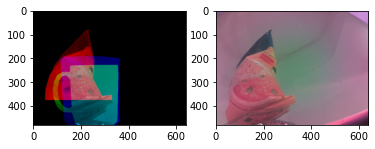

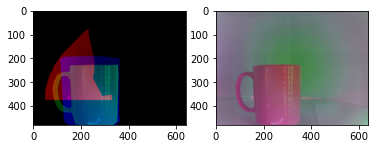

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


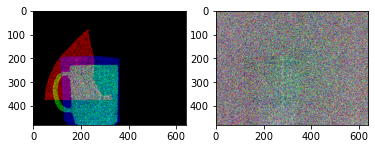

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


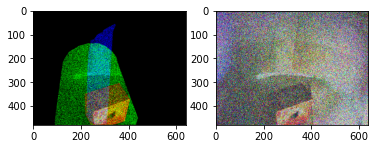

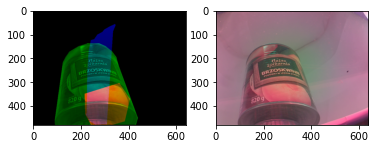

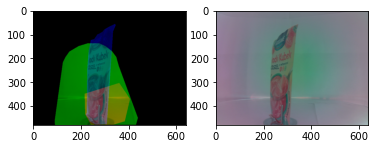

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


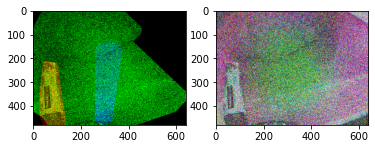

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


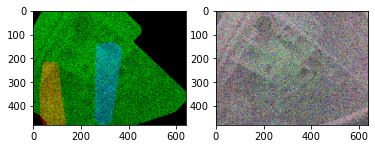

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


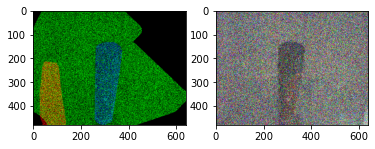

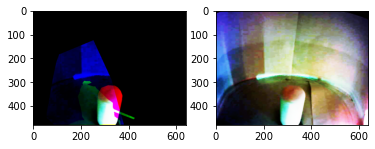

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


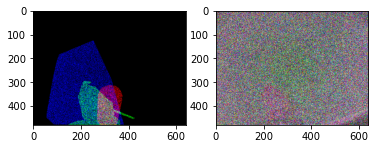

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


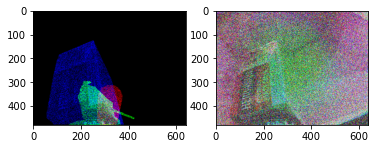

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


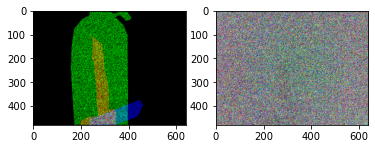

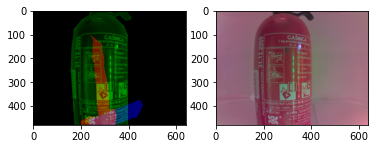

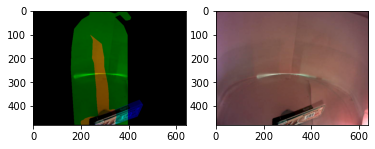

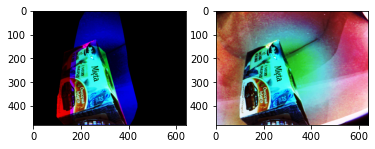

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


KeyboardInterrupt: 

In [4]:
for n, data in enumerate(dl):
    ims, masks = data
    ims, masks = transform_data(ims, masks)
    ims = main.denormalize(ims)
    for im, mask in zip(ims, masks):
        plt.subplot(1, 2, 1)
        plt.imshow((im*mask).permute((1,2,0)))
        plt.subplot(1, 2, 2)
        plt.imshow((im).permute((1,2,0)))
        plt.show()
    break

In [5]:
m = model.TransposeConvBNActivation(1, 3, stride=2, padding=0, kernel_size=2)
A = torch.randn((1, 1, 100, 100))
out = m(A)
out.shape

torch.Size([1, 3, 200, 200])

In [6]:
m2 = model.TransposedInvertedResidual(3, 32, 6)


In [7]:
import model
import torch
import torch.nn as nn
import data_loader

import matplotlib.pyplot as plt
from torch.utils import data
ful_mod = model.Segmentator()

In [8]:
s = 0
for p in ful_mod.parameters():
    s += p.numel()
print(s)

317025


In [9]:
A = torch.randn((8, 3, 128, 128))
out = ful_mod(A)
out.shape

torch.Size([8, 1, 128, 128])